<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score
df = pd.read_csv("carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

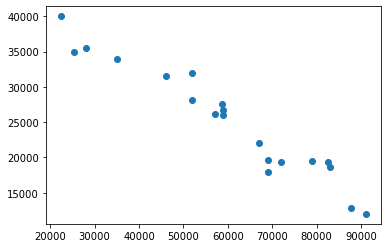

In [3]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

**Car Age Vs Sell Price ($)**

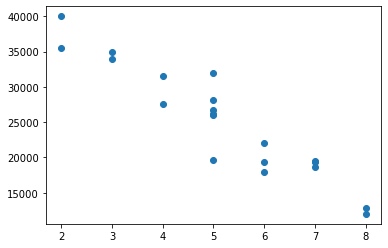

In [4]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [5]:
X = df[['Mileage','Age(yrs)']]

In [6]:
y = df['Sell Price($)']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

In [8]:
X_train

,Mileage,Age(yrs)
6,52000,5
7,72000,6
8,91000,8
15,25400,3
9,67000,6
16,28000,2
14,82450,7
12,59000,5
11,79000,7
18,87600,8


In [9]:
X_test

,Mileage,Age(yrs)
17,69000,5
0,69000,6
1,35000,3
19,52000,5
2,57000,5
5,59000,5


In [10]:
y_train

6     32000
7     19300
8     12000
15    35000
9     22000
16    35500
14    19400
12    26000
11    19500
18    12800
3     40000
4     31500
10    18700
13    27500
Name: Sell Price($), dtype: int64

In [11]:
y_test

17    19700
0     18000
1     34000
19    28200
2     26100
5     26750
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [12]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
a = clf.fit(X_train, y_train)

In [13]:
X_test

,Mileage,Age(yrs)
17,69000,5
0,69000,6
1,35000,3
19,52000,5
2,57000,5
5,59000,5


In [14]:
y_predict = clf.predict(X_test)
y_predict

array([23361.94194276, 22146.06325862, 34574.98671006, 27752.58564227,
       26461.2198483 , 25944.67353071])

In [15]:
y_test

17    19700
0     18000
1     34000
19    28200
2     26100
5     26750
Name: Sell Price($), dtype: int64

In [16]:
clf.score(X_test, y_test)

0.8137674146301367

In [17]:
scored =r2_score(y_test,y_predict)
print(scored)

0.8137674146301367


In [18]:
meanAbErr = metrics.mean_absolute_error(y_test, y_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('R squared: {:.2f}'.format(scored*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 81.38
Mean Absolute Error: 1666.158764458835
Mean Square Error: 5318246.526970872
Root Mean Square Error: 2306.1323741214146


In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict,'Difference':y_test-y_predict})
pred_df

,Actual Value,Predicted Value,Difference
17,19700,23361.941943,-3661.941943
0,18000,22146.063259,-4146.063259
1,34000,34574.986710,-574.986710
19,28200,27752.585642,447.414358
2,26100,26461.219848,-361.219848
5,26750,25944.673531,805.326469


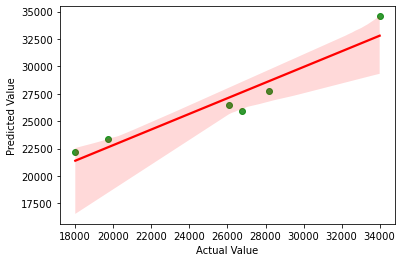

In [20]:
sns.regplot(x="Actual Value", y="Predicted Value",data=pred_df , scatter_kws={"color": "green"}, line_kws={"color": "red"});